In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('organic-carbon-emissions-from-industry.csv')

In [ ]:
df.head()

,Entity,Year,Organic carbon emissions from industry
0,Afghanistan,1750,0.0
1,Afghanistan,1751,0.0
2,Afghanistan,1752,0.0
3,Afghanistan,1753,0.0
4,Afghanistan,1754,0.0


In [ ]:
df.columns

Index(['Entity', 'Year', 'Organic carbon emissions from industry'], dtype='object')

In [ ]:
df.shape

(63609, 3)

In [ ]:
df.tail()

,Entity,Year,Organic carbon emissions from industry
63604,Zimbabwe,2018,1110.6329
63605,Zimbabwe,2019,1137.6168
63606,Zimbabwe,2020,1125.1106
63607,Zimbabwe,2021,1103.3478
63608,Zimbabwe,2022,1064.7845


In [ ]:
df['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'European

In [ ]:
grouped_data = df.groupby('Entity')['Organic carbon emissions from industry'].mean()
print(grouped_data.head(10))

Entity
Afghanistan              237.148628
Africa                 28542.836469
Albania                   68.407855
Algeria                   91.459055
American Samoa             0.287371
Angola                   246.760401
Antigua and Barbuda        3.615495
Argentina               5020.107968
Armenia                   19.463179
Aruba                      4.098741
Name: Organic carbon emissions from industry, dtype: float64


In [ ]:
india_2024 = df[(df['Entity'] == 'India') & (df['Year'] == 2024)]
print(india_2024)


Empty DataFrame
Columns: [Entity, Year, Organic carbon emissions from industry]
Index: []


In [ ]:
# Convert the Series to a DataFrame
grouped_data_df = grouped_data.to_frame()

# Now sort the DataFrame by the column which contains the emission values
top_10 = grouped_data_df.sort_values(by='Organic carbon emissions from industry', ascending=False).head(10)
print(top_10)

                               Organic carbon emissions from industry
Entity                                                               
World                                                   377435.980850
Asia                                                    163161.051344
Upper-middle-income countries                           138658.525930
Lower-middle-income countries                           122595.960670
High-income countries                                   104203.548996
India                                                    86023.189619
Europe                                                   71671.078188
South America                                            67704.622136
European Union (27)                                      59044.525016
Brazil                                                   47453.318265


In [ ]:
# List of entities that are NOT countries
non_countries = [
    'Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania', 'World',
    'High-income countries', 'Low-income countries', 'Lower-middle-income countries',
    'Upper-middle-income countries', 'European Union (27)', 'Other'
]

# Filter the DataFrame to exclude non-country entities
df_countries_only = df[~df['Entity'].isin(non_countries)]
print(df_countries_only['Entity'].nunique())
df_countries_only

220


,Entity,Year,Organic carbon emissions from industry
0,Afghanistan,1750,0.0000
1,Afghanistan,1751,0.0000
2,Afghanistan,1752,0.0000
3,Afghanistan,1753,0.0000
4,Afghanistan,1754,0.0000
...,...,...,...
63604,Zimbabwe,2018,1110.6329
63605,Zimbabwe,2019,1137.6168
63606,Zimbabwe,2020,1125.1106
63607,Zimbabwe,2021,1103.3478


In [ ]:
# Filter by year and by valid countries
df_cleaned = df_countries_only[
    (df_countries_only['Year'] >= 1900) &
    (df_countries_only['Year'] <= 2024) &
    (~df_countries_only['Entity'].isin(non_countries))
]
print(df_cleaned)

            Entity  Year  Organic carbon emissions from industry
150    Afghanistan  1900                                  0.0000
151    Afghanistan  1901                                  0.0000
152    Afghanistan  1902                                  0.0000
153    Afghanistan  1903                                  0.0000
154    Afghanistan  1904                                  0.0000
...            ...   ...                                     ...
63604     Zimbabwe  2018                               1110.6329
63605     Zimbabwe  2019                               1137.6168
63606     Zimbabwe  2020                               1125.1106
63607     Zimbabwe  2021                               1103.3478
63608     Zimbabwe  2022                               1064.7845

[27060 rows x 3 columns]


In [ ]:
df1 = df_cleaned.groupby('Entity')['Organic carbon emissions from industry'].mean()
df1=df1.to_frame()
df1=df1.reset_index()
df1 = df1.sort_values(by='Organic carbon emissions from industry', ascending=False).head(10)
df1 = df1.reset_index(drop=True)
print(df1)

          Entity  Organic carbon emissions from industry
0          India                           154873.848423
1         Brazil                           101693.624415
2        Germany                            78558.149367
3          China                            49918.147426
4  United States                            38472.901154
5      Indonesia                            22190.452447
6       Thailand                            20846.907498
7           Cuba                            18549.975127
8         Russia                            14763.972588
9        Vietnam                            14611.645598


In [ ]:
# Step 1: Calculate total emissions from all countries
total_all = df_cleaned['Organic carbon emissions from industry'].sum()

# Step 2: Calculate each top country's % contribution to the total
df1['% of Global Total'] = (df1['Organic carbon emissions from industry'] / total_all) * 100

# Step 3: Round for better readability
df1['% of Global Total'] = df1['% of Global Total'].round(4)  # or round(2) if preferred

print(df1)



          Entity  Organic carbon emissions from industry  % of Global Total
0          India                           154873.848423             0.1701
1         Brazil                           101693.624415             0.1117
2        Germany                            78558.149367             0.0863
3          China                            49918.147426             0.0548
4  United States                            38472.901154             0.0422
5      Indonesia                            22190.452447             0.0244
6       Thailand                            20846.907498             0.0229
7           Cuba                            18549.975127             0.0204
8         Russia                            14763.972588             0.0162
9        Vietnam                            14611.645598             0.0160


In [ ]:
# Group by Year and sum emissions across all countries
yearly_emissions = df_cleaned.groupby('Year')['Organic carbon emissions from industry'].sum()

# Sort and get top 5 years
top_5_years = yearly_emissions.sort_values(ascending=False).to_frame().reset_index()

print(top_5_years.head())


   Year  Organic carbon emissions from industry
0  2013                            1.627712e+06
1  2010                            1.609422e+06
2  2014                            1.607277e+06
3  2012                            1.601439e+06
4  2011                            1.593915e+06


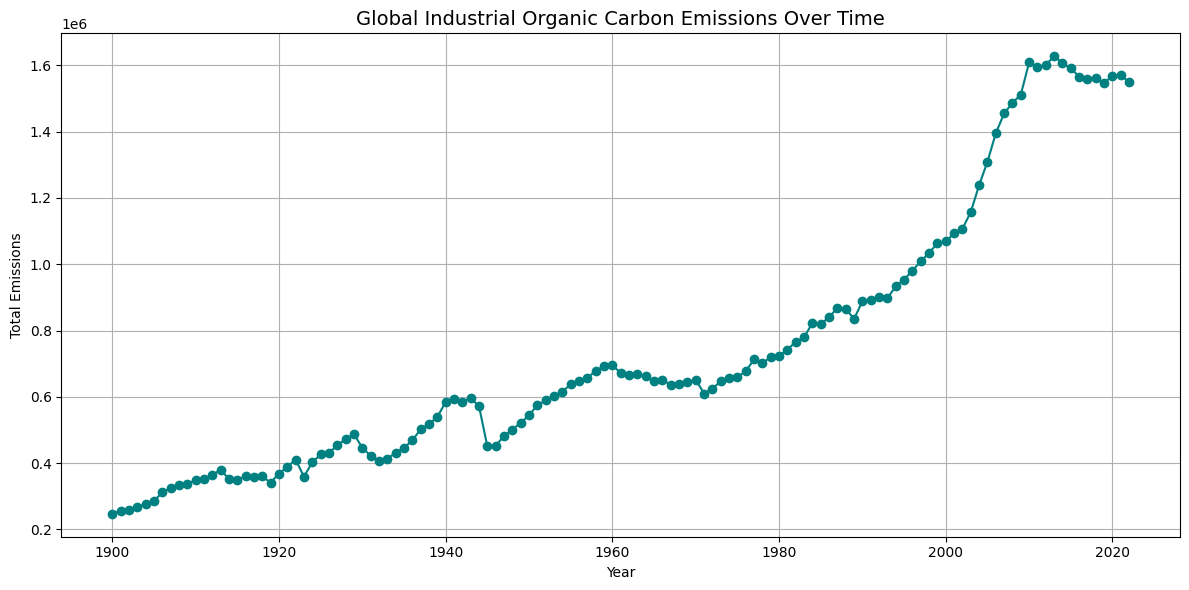

In [ ]:
import matplotlib.pyplot as plt

# 1. Group by year and calculate total emissions
emissions_trend = df_cleaned.groupby('Year')['Organic carbon emissions from industry'].sum()

# 2. Plotting
plt.figure(figsize=(12, 6))
plt.plot(emissions_trend.index, emissions_trend.values, marker='o', linestyle='-', color='teal')
plt.title('Global Industrial Organic Carbon Emissions Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_decade = df_cleaned[df_cleaned['Year'].between(2014, 2020)]
emission_2014 = df_decade[df_decade['Year'] == 2014].set_index('Entity')['Organic carbon emissions from industry']
emission_2024 = df_decade[df_decade['Year'] == 2020].set_index('Entity')['Organic carbon emissions from industry']
emission_change = pd.DataFrame({
    '2014': emission_2014,
    '2020': emission_2024
})

emission_change['Absolute Change'] = emission_change['2020'] - emission_change['2014']
emission_change['% Change'] = ((emission_change['2020'] - emission_change['2014']) / emission_change['2014']) * 100
top_increase = emission_change.sort_values(by='Absolute Change', ascending=False).head(10)
top_decrease = emission_change.sort_values(by='Absolute Change').head(10)
print(top_increase)

                   2014         2020  Absolute Change    % Change
Entity                                                           
India       473990.1600  582423.3000      108433.1400   22.876665
Indonesia    67093.0600   80754.3400       13661.2800   20.361689
Pakistan     35090.7200   44642.9500        9552.2300   27.221528
Turkey        2776.9482   10694.4070        7917.4588  285.113665
Vietnam      42868.1130   48272.6300        5404.5170   12.607313
Sri Lanka    14011.0470   16948.3870        2937.3400   20.964458
Russia        2944.1858    5598.8047        2654.6189   90.164789
Bangladesh     859.9724    3005.4539        2145.4815  249.482600
Cambodia      6603.7305    8288.3290        1684.5985   25.509801
Nepal         6382.8296    7780.5103        1397.6807   21.897509


In [ ]:
emission_change['Trend'] = emission_change['Absolute Change'].apply(
    lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change')
)
print(emission_change)

                          2014         2020  Absolute Change   % Change  \
Entity                                                                    
Afghanistan        1894.818200  1835.628400       -59.189800  -3.123772   
Albania              21.586685    25.625366         4.038681  18.709130   
Algeria             482.275540   303.963600      -178.311940 -36.973042   
American Samoa        0.559793     0.618449         0.058656  10.478225   
Angola              981.455200   889.765100       -91.690100  -9.342260   
...                        ...          ...              ...        ...   
Wallis and Futuna     0.819092     0.822586         0.003494   0.426558   
Western Sahara        8.096937     6.530295        -1.566642 -19.348576   
Yemen               508.119800   106.700860      -401.418940 -79.000846   
Zambia             6786.392600  6939.915000       153.522400   2.262209   
Zimbabwe           1041.024300  1125.110600        84.086300   8.077266   

                      Tr

In [ ]:
# Filter the data for 2013
df_2013 = df_cleaned[df_cleaned['Year'] == 2013]

# Group by country (Entity) and sum the emissions (if needed)
df_2013_emissions = df_2013.groupby('Entity')['Organic carbon emissions from industry'].sum().reset_index()

# Sort by highest emission
df_2013_emissions = df_2013_emissions.sort_values(by='Organic carbon emissions from industry', ascending=False)

# Get top 10 emitting countries
top_emitters_2013 = df_2013_emissions.head(10)

print(top_emitters_2013)


            Entity  Organic carbon emissions from industry
92           India                              453355.220
25          Brazil                              300561.160
39           China                              211872.640
195       Thailand                               69981.180
93       Indonesia                               64811.906
144        Nigeria                               55773.312
214        Vietnam                               39892.170
208  United States                               33331.547
150       Pakistan                               33304.950
72           Gabon                               23340.780


In [ ]:
# Filter the data for 2013
df_2013 = df_cleaned[df_cleaned['Year'] == 2013]

# Group by country (Entity) and sum the emissions (if needed)
df_2013_emissions = df_2013.groupby('Entity')['Organic carbon emissions from industry'].sum().reset_index()

# Sort by least emission
df_2013_emissions = df_2013_emissions.sort_values(by='Organic carbon emissions from industry', ascending=True)

# Get top 10 least emitting countries
top_emitters_2013 = df_2013_emissions.head(10)

print(top_emitters_2013)


                        Entity  Organic carbon emissions from industry
82                        Guam                                0.000000
77                   Gibraltar                                0.000000
79                   Greenland                                0.000000
114              Liechtenstein                                0.000000
66               Faroe Islands                                0.000000
197                    Tokelau                                0.024223
167  Saint Pierre and Miquelon                                0.052331
65            Falkland Islands                                0.182536
145                       Niue                                0.196998
133                 Montserrat                                0.283779


In [ ]:
import pandas as pd

# Assuming your emissions data is in this DataFrame:
# Columns: 'Entity', 'Year', 'Emission'

# Define developed and developing country lists
developed_countries = [  # from earlier classification
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France',
    'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
    'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Singapore',
    'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States'
]

# Add a new column to classify countries
df['Status'] = df['Entity'].apply(lambda x: 'Developed' if x in developed_countries else 'Developing')

# Group by year and development status and sum emissions
emission_comparison = df.groupby(['Year', 'Status'])['Organic carbon emissions from industry'].sum().reset_index()

# Optional: Pivot to compare side-by-side
emission_pivot = emission_comparison.pivot(index='Year', columns='Status', values='Organic carbon emissions from industry')


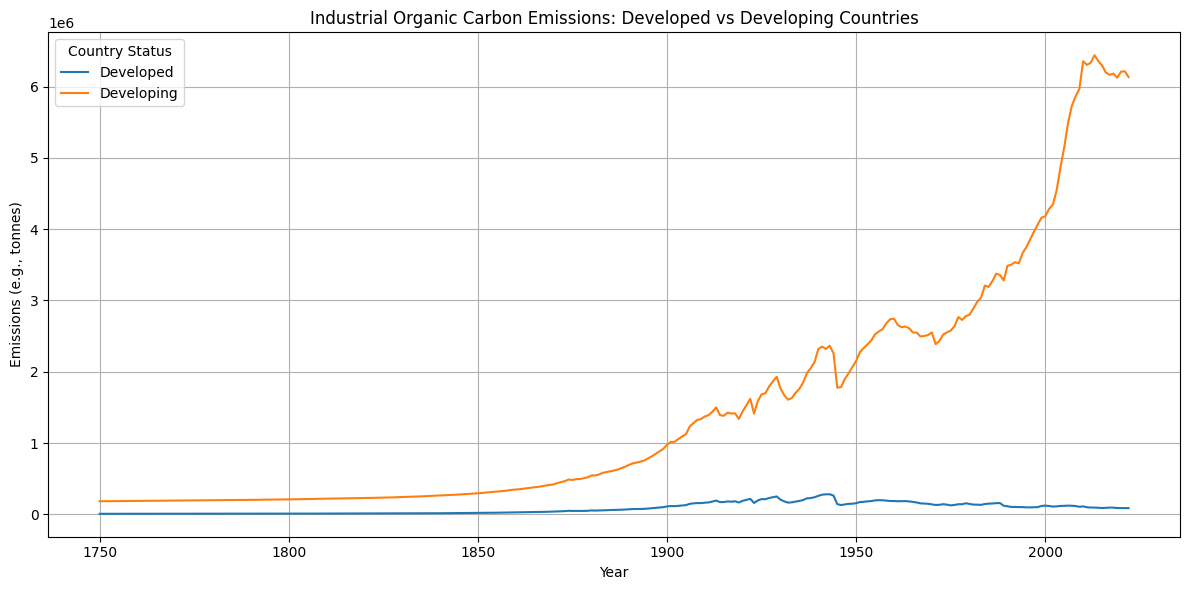

In [ ]:
import matplotlib.pyplot as plt

emission_pivot.plot(kind='line', figsize=(12, 6))
plt.title('Industrial Organic Carbon Emissions: Developed vs Developing Countries')
plt.ylabel('Emissions (e.g., tonnes)')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Country Status')
plt.tight_layout()
plt.show()


In [ ]:
# Group by Entity and find emissions in the earliest and latest years
earliest = df_cleaned.sort_values('Year').groupby('Entity').first().reset_index()
latest = df_cleaned.sort_values('Year').groupby('Entity').last().reset_index()

# Merge the two on Entity
merged = earliest.merge(latest, on='Entity', suffixes=('_start', '_end'))

# Calculate absolute and percentage growth
merged['Absolute_Growth'] = merged['Organic carbon emissions from industry_end'] - merged['Organic carbon emissions from industry_start']
merged['Percentage_Growth'] = (
    (merged['Organic carbon emissions from industry_end'] - merged['Organic carbon emissions from industry_start']) / merged['Organic carbon emissions from industry_start'].replace(0, pd.NA)
) * 100


In [ ]:
# Drop invalid or missing values
valid = merged.dropna(subset=['Percentage_Growth'])

# Sort by percentage growth
top_growth = valid.sort_values(by='Percentage_Growth', ascending=False).head(10)


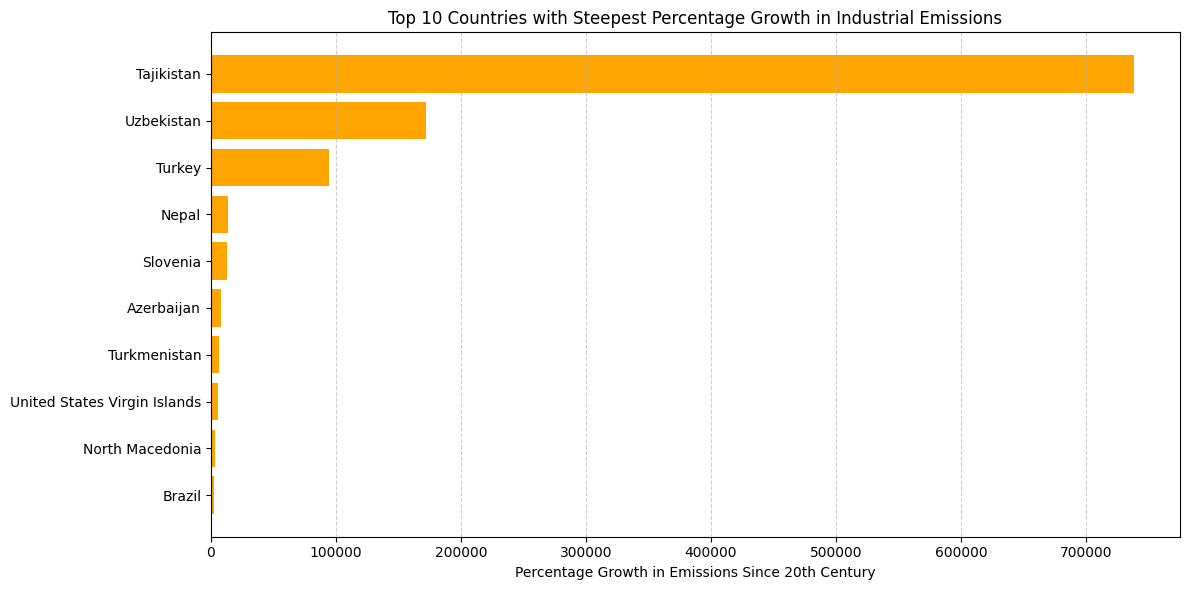

In [ ]:
import matplotlib.pyplot as plt

# Sort again to make the bar chart readable
top_growth_sorted = top_growth.sort_values(by='Percentage_Growth', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(top_growth_sorted['Entity'], top_growth_sorted['Percentage_Growth'], color='orange')
plt.xlabel('Percentage Growth in Emissions Since 20th Century')
plt.title('Top 10 Countries with Steepest Percentage Growth in Industrial Emissions')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


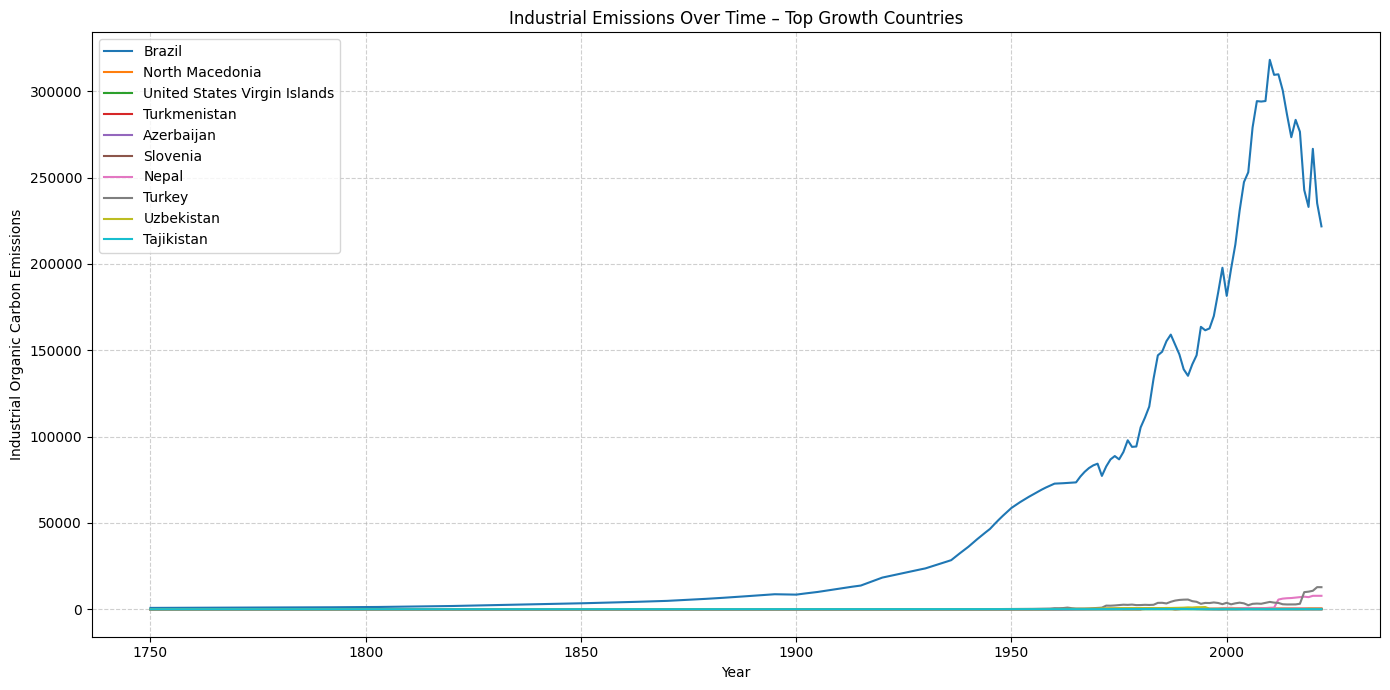

In [ ]:
top_countries = top_growth_sorted['Entity'].tolist()
df_top = df[df['Entity'].isin(top_countries)]

plt.figure(figsize=(14, 7))
for country in top_countries:
    country_data = df_top[df_top['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Organic carbon emissions from industry'], label=country)

plt.xlabel('Year')
plt.ylabel('Industrial Organic Carbon Emissions')
plt.title('Industrial Emissions Over Time – Top Growth Countries')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
india_df = df_cleaned[df_cleaned['Entity'] == 'India'].sort_values(by='Year')
start_year = india_df['Year'].min()
end_year = india_df['Year'].max()

start_value = india_df[india_df['Year'] == start_year]['Organic carbon emissions from industry'].values[0]
end_value = india_df[india_df['Year'] == end_year]['Organic carbon emissions from industry'].values[0]

num_years = end_year - start_year

# AAGR
aagr = ((end_value - start_value) / (start_value * num_years)) * 100

# CAGR
cagr = ((end_value / start_value) ** (1 / num_years) - 1) * 100

print(f"India's AAGR in emissions ({start_year} to {end_year}): {aagr:.2f}% per year")
print(f"India's CAGR in emissions ({start_year} to {end_year}): {cagr:.2f}% per year")


India's AAGR in emissions (1900 to 2022): 10.50% per year
India's CAGR in emissions (1900 to 2022): 2.17% per year


In [ ]:
results = []

for country, group in df_cleaned.groupby('Entity'):
    group_sorted = group.sort_values('Year')
    start_year = group_sorted['Year'].min()
    end_year = group_sorted['Year'].max()

    start_emission = group_sorted[group_sorted['Year'] == start_year]['Organic carbon emissions from industry'].values[0]
    end_emission = group_sorted[group_sorted['Year'] == end_year]['Organic carbon emissions from industry'].values[0]

    if start_emission == 0:
        continue  # skip divide-by-zero

    pct_change = ((end_emission - start_emission) / start_emission) * 100

    if pct_change <= -20:
        results.append({
            'Country': country,
            'Start Year': start_year,
            'Start Emission': start_emission,
            'End Year': end_year,
            'End Emission': end_emission,
            '% Change': pct_change
        })

# Convert to DataFrame
reduced_df = pd.DataFrame(results).sort_values(by='% Change')

print(f"{len(reduced_df)} countries significantly reduced their emissions (≥20% drop):")
display(reduced_df)

24 countries significantly reduced their emissions (≥20% drop):


,Country,Start Year,Start Emission,End Year,End Emission,% Change
11,Germany,1900,71080.664000,2022,3440.983000,-95.159045
4,Barbados,1900,225.296110,2022,11.442366,-94.921188
14,Hungary,1900,7304.898400,2022,383.669070,-94.747784
17,Martinique,1900,135.231750,2022,16.092585,-88.099995
12,Guadeloupe,1900,126.306460,2022,18.410742,-85.423753
3,Austria,1900,5669.218800,2022,937.631800,-83.461005
13,Guatemala,1900,747.561160,2022,140.169080,-81.249818
8,Czechia,1900,2491.471000,2022,989.997100,-60.264555
23,United Kingdom,1900,4322.735000,2022,1755.735400,-59.383691
16,Italy,1900,1912.190200,2022,833.353000,-56.418927


<ipython-input-36-358344b2849b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='% Change', y='Country', data=reduced_df.head(15), palette='coolwarm')


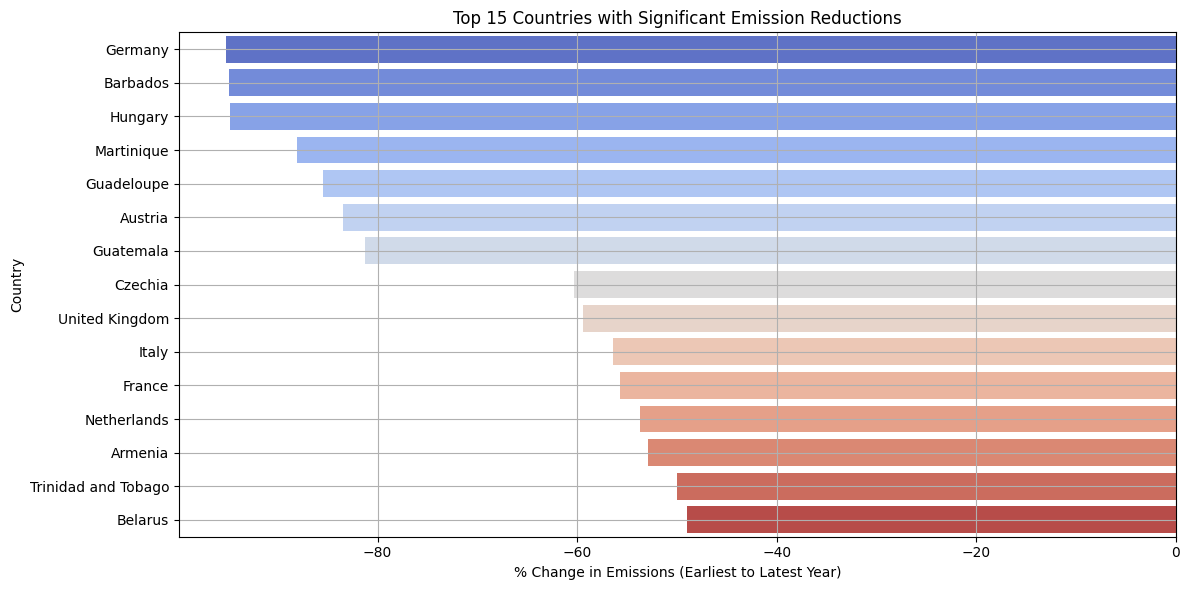

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by % Change and plot
plt.figure(figsize=(12, 6))
sns.barplot(x='% Change', y='Country', data=reduced_df.head(15), palette='coolwarm')
plt.title('Top 15 Countries with Significant Emission Reductions')
plt.xlabel('% Change in Emissions (Earliest to Latest Year)')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Group by country and calculate total emissions per country across all years
country_emissions = df_cleaned.groupby('Entity')['Organic carbon emissions from industry'].sum()

# Compute overall statistics
mean_emission = country_emissions.mean()
median_emission = country_emissions.median()
std_emission = country_emissions.std()

print(f"Mean emission per country: {mean_emission:.2f}")
print(f"Median emission per country: {median_emission:.2f}")
print(f"Standard deviation of emissions per country: {std_emission:.2f}")


Mean emission per country: 413975.65
Median emission per country: 19532.77
Standard deviation of emissions per country: 1761254.00
